In [1]:
import numpy as np

def darboux(f, a, b, epsilon, precision, increment=1, n=1):
    record = []
    
    while True:
        upper_terms = []
        lower_terms = []

        partition = np.linspace(a, b, n+1)
        delta = partition[1] - partition[0]

        for i in range(len(partition)-1):
            lower, upper = partition[i], partition[i+1]
            
            options = np.linspace(lower, upper, precision)
            values = list(map(f, options))
            
            upper_terms.append(max(values)*delta)
            lower_terms.append(min(values)*delta)

        upper_sum = sum(upper_terms)
        lower_sum = sum(lower_terms)

        record.append((lower_sum, upper_sum, n))
        
        e = upper_sum - lower_sum
        
        if e < epsilon:
            return record
        else:
            n+= increment

In [2]:
d = darboux(lambda x: x**2, a=0, b=1, epsilon=.1, precision=5)

for iteration in d: 
    print(iteration)

(0.0, 1.0, 1)
(0.125, 0.625, 2)
(0.18518518518518517, 0.5185185185185185, 3)
(0.21875, 0.46875, 4)
(0.24000000000000005, 0.44000000000000006, 5)
(0.2546296296296296, 0.4212962962962963, 6)
(0.26530612244897955, 0.4081632653061224, 7)
(0.2734375, 0.3984375, 8)
(0.279835390946502, 0.3909465020576131, 9)
(0.2850000000000001, 0.3850000000000001, 10)
(0.2892561983471075, 0.3801652892561984, 11)


In [3]:
%%time
d = darboux(lambda x: (x**2+2*x), 
            a=3, b=4.5, 
            epsilon=.1, 
            precision=5, 
            increment=1)

print(d[-1])

(32.575070693947964, 32.67495387151806, 214)
Wall time: 587 ms


In [4]:
%%time
d = darboux(lambda x: (x**2+2*x), 
            a=3, b=4.5, 
            epsilon=.001, 
            precision=5, 
            increment=500)

print(d[-1])

(32.62450293126423, 32.625497071071685, 21501)
Wall time: 11.4 s


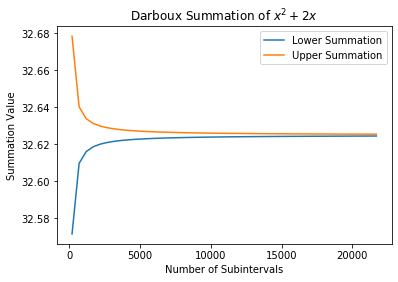

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

d = darboux(lambda x: (x**2+2*x), 
            a=3, b=4.5, 
            epsilon=.001, 
            precision=5, 
            increment=500, n=200)

lower, upper, n = zip(*d)
plt.plot(n, lower, label = 'Lower Summation')
plt.plot(n, upper, label = 'Upper Summation')
plt.legend()
plt.title(r"Darboux Summation of $x^2+2x$")
plt.xlabel('Number of Subintervals')
plt.ylabel('Summation Value')
plt.savefig('darboux.png', dpi=600)
plt.show()